## **Notebook to make predictions with reprocessed Yoneda data and E-Flux2** 

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime

### E-Flux2 predictions and evaluations
This notebook predicts fluxes for R. opacus cultures growing with glucose.

#### **Data Labels**:

#### Henson transcriptomics data: 
* WT 1.0 g/L Glucose (**WT-G**) (3 trials at 2 timepoints, 6 total trials)

#### Combined with Rhiannon 2018 metabolomics and OD data:
* Metabolomics and OD data for WT Glucose (**WT-G**)
                                               

### Method: 
<ol>
<li>Predict fluxes with E-Flux2</li>
<li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
<li>Load file with observed growth rates (Notebook E)</li>
<li>Save growth rate predictions to csv file</li>
</ol>



#### **Set up imports**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
import scipy.stats
#import cplex
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm

from edd_utils import login, export_study, export_metadata

from sklearn.metrics import r2_score

output_dir = '../plots/'
source_dir = '../src'
sys.path.append(source_dir)
from ensemblemethods import *


from plot import *
from utils import *

#### **Load Genome Scale Model**

In [2]:
model = cobra.io.read_sbml_model("../models/Ropacus_annotated_curated.xml")

#### **Load Transcript Data**

In [3]:
# read transcripts and isolate wildtype glucose data
transcript_df = pd.read_csv('../data/transcripts/csv/henson_CPM_melted.csv')
transcript_df = transcript_df[transcript_df['Line Name'].str.contains("WT-Glu")]

# separate data from different time points
transcript_df_T1 = transcript_df[transcript_df['Time'] == 10]
transcript_df_T2 = transcript_df[transcript_df['Time'] == 13]

# preview data
display(transcript_df_T1.head())
display(transcript_df_T2.head())

,Line Name,Measurement Type,Time,Count,Units
6,WT-Glu-R1,WP_005263480_1,10,27.446117,CPM
7,WT-Glu-R2,WP_005263480_1,10,27.543845,CPM
8,WT-Glu-R3,WP_005263480_1,10,26.797758,CPM
60,WT-Glu-R1,WP_005249107_1,10,355.352526,CPM
61,WT-Glu-R2,WP_005249107_1,10,349.533393,CPM


,Line Name,Measurement Type,Time,Count,Units
9,WT-Glu-R1,WP_005263480_1,13,15.584245,CPM
10,WT-Glu-R2,WP_005263480_1,13,22.444427,CPM
11,WT-Glu-R3,WP_005263480_1,13,20.433310,CPM
63,WT-Glu-R1,WP_005249107_1,13,219.798570,CPM
64,WT-Glu-R2,WP_005249107_1,13,328.518773,CPM


#### **Run E-Flux2 for Each Condition**

In [4]:
# create dictionary to hold eflux solutions
eflux_solutions = {}

# loop over trials
for time in ['T1', 'T2']:
    for trial in ['WT-Glu-R1', 'WT-Glu-R2','WT-Glu-R3']:
        
        # display trial name
        trial_number = trial.split('-R')[1]
        trial_name = f'glucose_eflux_{time.lower()}_{trial_number}'
        print(trial_name)
        
        # get the data for that trial
        transcriptomics = []
        if time == 'T1':
            transcriptomics = transcript_df_T1[transcript_df_T1['Line Name'] == trial]
        else:
            transcriptomics = transcript_df_T2[transcript_df_T2['Line Name'] == trial]

        # map the transcripts to genome scale reactions
        trans_data = construct_trans_df(transcriptomics, trial)
        
        # run eflux to get genome scale fluxes
        eflux2_sol = eflux2_pred(model, trans_data, trial, 'glucose', sub_uptake_rate=100)
        
        print(f"The glucose uptake rate is {eflux2_sol['EX_glc__D_e']}")
        
        # add eflux solution to dictionary
        eflux_solutions[trial_name] = eflux2_sol

glucose_eflux_t1_1
FBA status optimal
FBA solution 17.786452712551018


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


EFlux2 status infeasible
EFlux2 solution 4456495.91401118
The glucose uptake rate is -141.57155032104697
glucose_eflux_t1_2
FBA status optimal
FBA solution 20.701424843985844


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status infeasible
EFlux2 solution 6267077.880028009
The glucose uptake rate is -165.4631459192241
glucose_eflux_t1_3
FBA status optimal
FBA solution 19.6006532588346


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status infeasible
EFlux2 solution 5735223.68611601
The glucose uptake rate is -156.3814382794709
glucose_eflux_t2_1
FBA status optimal
FBA solution 24.446676426898204


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 7559719.755237073
The glucose uptake rate is -215.4269648535484
glucose_eflux_t2_2
FBA status optimal
FBA solution 24.77948372562568


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 8233234.32159505
The glucose uptake rate is -209.8912640005305
glucose_eflux_t2_3
FBA status optimal
FBA solution 20.03970456204593


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 4740190.6398873385
The glucose uptake rate is -187.30477581322214


In [5]:
eflux_solutions['glucose_eflux_t1_1']['EX_glc__D_e']

-141.57155032104697

#### **Save Glucose E-Flux2 Genome Scale Fluxes**

In [6]:
for trial_name, flux_solution in eflux_solutions.items():
    print(flux_solution.fluxes)

12DGR140tipp        0.000000
13PPDH              0.000000
1P2CBXLCYCL         0.000000
1P2CBXLR            0.000000
23CTI1              0.000000
                     ...    
Growth_Glucose     17.786453
CBFC2pp           556.059830
NDH1_4pp          556.059830
CYO1bpp_syn       556.059830
CYTBDpp            28.630596
Name: fluxes, Length: 3025, dtype: float64
12DGR140tipp        0.000000
13PPDH              0.000000
1P2CBXLCYCL         0.000000
1P2CBXLR            0.000000
23CTI1              0.000000
                     ...    
Growth_Glucose     20.701425
CBFC2pp           664.814192
NDH1_4pp          664.814192
CYO1bpp_syn       664.814192
CYTBDpp            24.873138
Name: fluxes, Length: 3025, dtype: float64
12DGR140tipp        0.000000
13PPDH              0.000000
1P2CBXLCYCL         0.000000
1P2CBXLR            0.000000
23CTI1              0.000000
                     ...    
Growth_Glucose     19.600653
CBFC2pp           633.114230
NDH1_4pp          633.114230
CYO1bpp_syn    

In [8]:
# loop over solution dictionary. Convert the flux solutions to 
for trial_name, flux_solution in eflux_solutions.items():

    flux_df = eflux_solution_to_df(model, flux_solution)
    flux_df.to_csv(f'../data/genome_scale_fluxes/{trial_name}.csv', index=False)

    display(flux_df.tail(5))

,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,17.786453
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,556.059830
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,556.059830
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,556.059830
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,28.630596


,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,20.701425
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,664.814192
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,664.814192
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,664.814192
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,24.873138


,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,19.600653
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,633.114230
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,633.114230
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,633.114230
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,29.897422


,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,24.446676
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,696.906415
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,696.906415
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,696.906415
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,60.051045


,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,24.779484
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,760.033012
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,760.033012
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,760.033012
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,0.000000


,reaction_id,reaction_name,reaction_reaction,flux
3020,Growth_Glucose,Glucose biomass reaction,0.000216 10fthf_c + 0.182767992209545 ala__L_c...,20.039705
3021,CBFC2pp,Cytochrome b6/f complex periplasm,2.0 ficytc6_p + 2.0 h_c + pqh2_p --> 2.0 focyt...,542.756696
3022,NDH1_4pp,Active co2 transporter facilitator (periplasm),co2_p + h2o_c + 3.0 h_c + nadph_c + pq_p --> 3...,542.756696
3023,CYO1bpp_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_p + 4.0 h_c + 0.5 o2_p --> 2.0 fic...,542.756696
3024,CYTBDpp,Cytochrome oxidase bd (ubiquinol-8: 2 protons)...,2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2.0 h_...,38.682258


#### **Get Average and Standard Deviation of Genome Scale Fluxes**

In [31]:
# can curate trials to use
relevant_trials = [
    'glucose_eflux_t1_1', 
    'glucose_eflux_t1_2', 
    'glucose_eflux_t1_3',
    'glucose_eflux_t2_1', 
    'glucose_eflux_t2_2', 
    'glucose_eflux_t2_3'
]

# define constants to use below
uptake_reaction = 'EX_glc__D_e'
normalized_uptake_rate = -100

# get list of relevant flux vectors
flux_vectors = [eflux_solutions[trial_name].fluxes for trial_name in relevant_trials]

# combine into a single dataframe, and name columns
all_flux_vector_df = pd.concat(flux_vectors, axis=1)
all_flux_vector_df.columns = relevant_trials

# scale columns so that all have the same uptake rate
for trial in relevant_trials:
    # get the uptake rate for the trial
    current_uptake_rate = all_flux_vector_df[trial][uptake_reaction]
    
    # calculate the scale factor to get the ratio of the current uptake rate to the normalized uptake value
    scale_factor = normalized_uptake_rate / all_flux_vector_df[trial][uptake_reaction]

    # update the fluxes in the dataframe with scaled fluxes
    all_flux_vector_df[trial] = scale_factor * all_flux_vector_df[trial]

# calculate average and standard deviation of flux vectors
average_eflux_solution = pd.DataFrame(all_flux_vector_df.mean(axis=1), columns=['fluxes'])
std_eflux_solution =  pd.DataFrame(all_flux_vector_df.std(axis=1), columns=['stds'])

# # save average flux vector
average_eflux_solution.to_csv('../data/genome_scale_fluxes/glucose_eflux.csv')

display(average_eflux_solution.tail())
display(std_eflux_solution.tail())

,fluxes
Growth_Glucose,11.910252
CBFC2pp,362.466497
NDH1_4pp,362.466497
CYO1bpp_syn,362.466497
CYTBDpp,17.150252


,stds
Growth_Glucose,0.770852
CBFC2pp,47.041709
NDH1_4pp,47.041709
CYO1bpp_syn,47.041709
CYTBDpp,9.372558


#### **Load Glucose 13C MFA Data**

In [32]:
glucose_fluxes = pd.read_csv('../data/central_fluxes/glucose_13C.csv')

# # Remove rows that do not have a mapping to the GSM
glucose_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and E-Flux2')

glucose_fluxes.head()

There are 44 fluxes that can be compared between the MFA and E-Flux2


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91


#### **Map Glucose E-Flux2 fluxes to 13C MFA Reactions**

In [33]:
glucose_fluxes = add_pred_fluxes_to_13c_df(glucose_fluxes, average_eflux_solution, std_eflux_solution , 'glucose', 'E-Flux2', 'WT')
glucose_fluxes.head()

scale_factor fluxes    1.0
Name: EX_glc__D_e, dtype: float64


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,E-Flux2 WT Value,E-Flux2 WT std Value
0,Substrate Uptake,reverse_EX_glc__D_e,Gluc.ext + ATP -> G6P,"(50, 460)",100.00,100.00,100.00,100.000000,6.355287e-15
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-1.61,-2.09,1.42,51.210936,3.338848e+01
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",0.00,0.00,1.91,37.567611,6.358788e+00
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",0.00,0.00,1.91,37.567611,6.358788e+00
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",0.00,0.00,1.91,13.288824,3.450657e+00


#### **Save Glucose E-Flux2 Central Flux Predictions**

In [34]:
glucose_fluxes.to_csv('../data/central_fluxes/glucose_eflux.csv', index=False)

#### **Plot Glucose E-Flux2 Fluxes vs 13C MFA Fluxes**

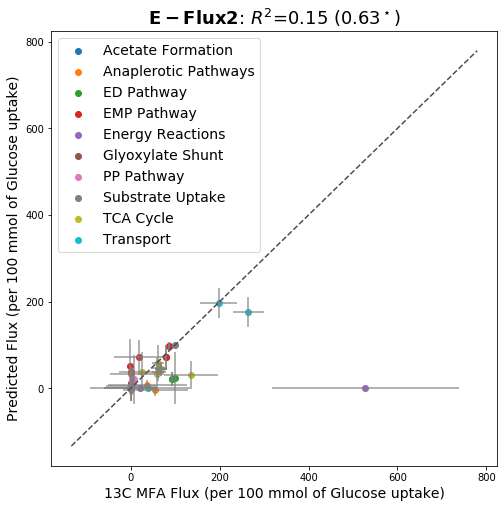

In [35]:
obs_vs_pred_scatter_plot_with_std(glucose_fluxes, substrate='glucose', method='E-Flux2', strain='WT', output_dir=output_dir)

#### **Display Glucose E-Flux2 Flux Map**

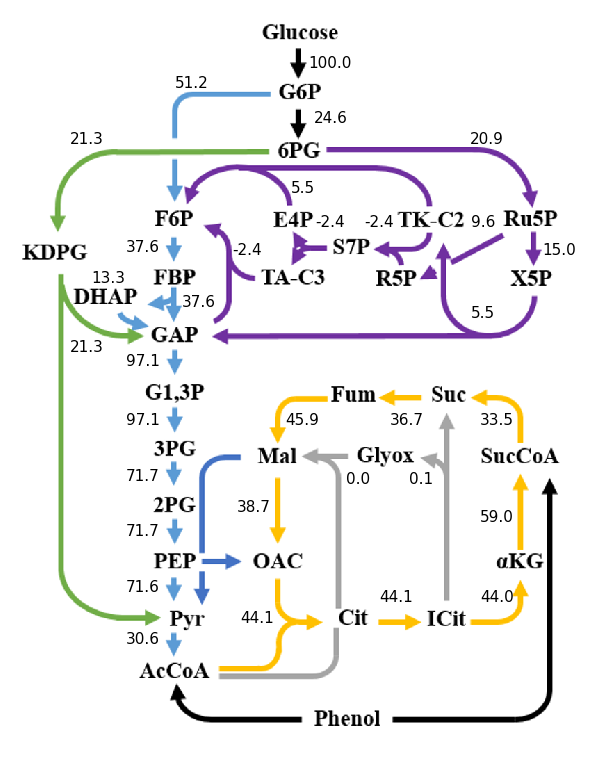

In [36]:
generate_flux_map(glucose_fluxes, 'E-Flux2 WT Value', substrate='glucose', method='E-Flux2', strain='WT', output_dir=output_dir)

#### **Load experimental growth parameters from Notebook E**

In [37]:
consumption_and_growth_data = pd.read_csv('../data/growth_rates/experimental_growth_parameters.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


#### **Calculate E-Flux2 Glucose Growth Rate**

In [38]:
# get experimental uptake rate from table
exp_uptake_rate = consumption_and_growth_data.loc['WT-G', 'substrate consumption rate']

# get average and standard deviation of growth rate from dataframes
average_growth_rate = average_eflux_solution.loc['Growth_Glucose',:].values[0] 
std_growth_rate = std_eflux_solution.loc['Growth_Glucose',:].values[0] 

# get average and standard deviation of uptake rate from dataframes
average_uptake_rate = average_eflux_solution.loc['EX_glc__D_e',:].values[0] 
std_uptake_rate = std_eflux_solution.loc['EX_glc__D_e',:].values[0] 

# normalize growth rate to experimental uptake rate
eflux_growth_rate = -1 * exp_uptake_rate * (average_growth_rate / average_uptake_rate)
eflux_growth_rate_std = -1 * exp_uptake_rate * (std_growth_rate / average_uptake_rate)

# Delete later
print(exp_uptake_rate)
print(average_growth_rate)
print('average uptake rate', average_uptake_rate)

3.582470920816068
11.910252233726965
average uptake rate -100.0


#### **Add E-Flux2 Glucose Data to Growth Rate Data**

In [39]:
consumption_and_growth_data['E-Flux2 growth rate'] = [np.nan, np.nan, eflux_growth_rate]
consumption_and_growth_data['E-Flux2 growth std'] = [np.nan, np.nan, eflux_growth_rate_std]
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,E-Flux2 growth rate,E-Flux2 growth std
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,NaN,NaN
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,NaN,NaN
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.426681,0.027616


#### **Save E-Flux2 Growth Rates**

In [40]:
consumption_and_growth_data.to_csv('../data/growth_rates/eflux2_growth_rates.csv', index=True, header=True)